## 5. 2D POINT CLOUD GENERATION USING MATPLOTLIB

Use the following script to generate a 2D version of your point cloud which you can then superimpose on the centroid of the color image for visualization purposes. 

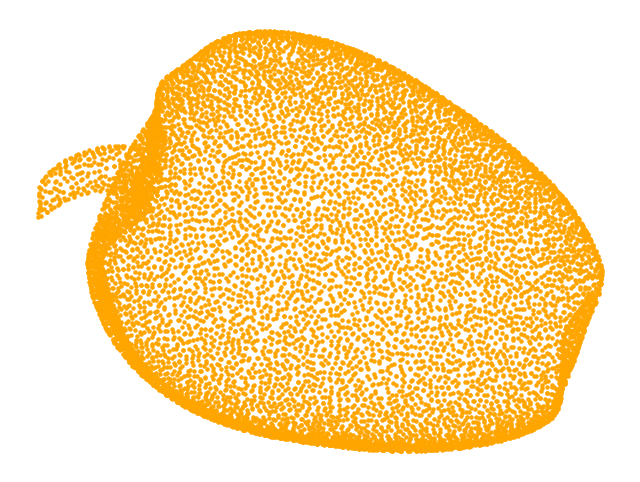

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData

def read_point_cloud_from_ply(file_path):
    plydata = PlyData.read(file_path)
    x = plydata['vertex']['x']
    y = plydata['vertex']['y']
    z = plydata['vertex']['z']
    return np.vstack((x, y, z)).T

def orthographic_projection(vertices, view_direction):
    # Removing the axis (x, y or z) of the view direction
    return np.delete(vertices, view_direction, axis=1)

# Replace with the path to your point cloud
file_path = "/home/roli_005/TE3002B_ws/src/module_munoz/3D-SemiDeformable-ObjectTracking/Reference Notebooks/results/ICP_result/icp_result_pancake.ply"

point_cloud = read_point_cloud_from_ply(file_path)

# Compute centroids
# point_cloud_centroid = compute_centroid(point_cloud)  # Assuming you have a function called compute_centroid
# target_centroid = np.array([406.79199932, 166.07250697, 412.96217105])  # replace with the centroid of the figure in the picture

# Determine translation needed to move point cloud's centroid to target
# translation_vector = target_centroid - point_cloud_centroid

# Transformation parameters
# scale_factor = 0.000001  # replace s with desired scale factor; for non-uniform scaling, use np.array([sx, sy, sz])

# Apply transformations
# point_cloud = translate_point_cloud(point_cloud, translation_vector)  # Assuming you have a function called translate_point_cloud
# point_cloud = scale_point_cloud(point_cloud, scale_factor)  # Assuming you have a function called scale_point_cloud

# Project vertices
view_direction = 2  # 0:X, 1:Y, 2:Z
projected_points = orthographic_projection(point_cloud, view_direction)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
# Commented out the following line to remove the background image
# ax.imshow(bg_image, extent=[min(projected_points[:, 0]), max(projected_points[:, 0]), min(projected_points[:, 1]), max(projected_points[:, 1])])
ax.scatter(projected_points[:, 0], projected_points[:, 1], color='orange', s=5)
# Added the following line to remove the axes
ax.axis('off')

plt.show()


In [4]:
two_d_pc_path = "/home/roli_005/TE3002B_ws/src/module_munoz/3D-SemiDeformable-ObjectTracking/Reference Notebooks/results/two_d_pc/2d_pc_v1.png"
fig.savefig(two_d_pc_path, transparent=True)